# Assignment 8: November $1^{st}$, 2025 - Kanak Agarwal

## Redlich-Kwong equation

$$p = \frac{RT}{v - b} - \frac{a}{v (v + b)\sqrt{T}}$$

Where:
- \(p\) = Pressure
- \(R\) = Universal gas constant [ = 0.518 kJ/kg K]
- \(T\) = Temperature
- \(v\) = Molar volume
- \(a\) = Attraction parameter
- \(b\) = Volume exclusion parameter

$$a = 0.427 \, \frac{R^2 T_c^{2.5}}{p_c}$$


and,

$$b = 0.0866 \, \frac{RT_c}{p_c}$$

In [12]:
import math

R = 518.0               # kJ/kg·K
p_c = 4600              # kPa
T_c = 191.0             # K
v_tank = 3.0            # m³
T = 233.15              # K (-40 °C)
p = 65e3                # kPa

# Redlich Kwong parameters
a = 0.427 * R**2 * T_c**2.5 / p_c
b = 0.0866 * R * T_c / p_c

# Function - Redlich Kwong equation
def f(v):
    return (R * T) / (v - b) - a / (v * (v + b) * math.sqrt(T)) - p


v_low = 0.0 + 1e-8  # avoid singularity (small tolerance)
v_high = 2.0
tolerance = 2.0   # % relative error

# Bisection method
v_old = 0
error = 100
iteration = 0

while error > tolerance:
    v_mid = (v_low + v_high) / 2
    f_low = f(v_low)
    f_mid = f(v_mid)

    # Update bracket
    if f_low * f_mid < 0:
        v_high = v_mid
    else:
        v_low = v_mid

    # Compute relative error
    if iteration > 0:
        error = abs((v_mid - v_old) / v_mid) * 100

    v_old = v_mid
    iteration += 1

# Results
v_specific = v_mid           # m^3/kg
mass = v_tank / v_specific   # kg

print(f"Iterations: {iteration}")
print(f"Specific Volume: {v_specific:.6e} m^3/kg")
print(f"Approx. relative error: {error:.2f} %")
print(f"Mass of methane in 3 m^3 tank: {mass:.2f} kg")


Iterations: 6
Specific Volume: 1.843750e+00 m^3/kg
Approx. relative error: 1.69 %
Mass of methane in 3 m^3 tank: 1.63 kg


## Colebrook–White Equation

The implicit formulation is given by,

$$\frac{1}{\sqrt{f}} = -2.0 \, \log_{10}\left(\frac{\epsilon/D}{3.7} + \frac{2.51}{Re\sqrt{f}}\right)$$

The explicit formulation is given by,

$$f = \frac{0.25}{\left[ \log_{10}\left(\frac{\epsilon/D}{3.7} + \frac{5.74}{Re^{0.9}}\right)\right]^2}$$

In [20]:
import math

D = 0.05          # m
eps = 0.00015     # m
Re = 2.0e5
f = 0.02          # initial guess
tol = 0.1         # % tolerance
iteration = 0
error = 100.0     # initial relative error

# Colebrook white equation and its derivative
def colewhite(f):
    return 1 / math.sqrt(f) + 2.0 * math.log10((eps / D) / 3.7 + 2.51 / (Re * math.sqrt(f)))

# Deriviative of the colebrook white equation wrt f
def dcolewhite_df(f):
    term = (eps / D) / 3.7 + 2.51 / (Re * math.sqrt(f))
    dterm_df = -2.51 / (2 * Re * f ** 1.5)
    return (-0.5) * f ** (-1.5) + (2.0 / (math.log(10) * term)) * dterm_df

print(f"{'Iter':>4} {'f':>9} {'Error (%)':>15}")
print("-" * 30)

# Newton–Raphson
while error > tol:
    iteration += 1
    f_new = f - colewhite(f) / dcolewhite_df(f)
    error = abs((f_new - f) / f_new) * 100
    print(f"{iteration:4d} {f_new:12.6f} {error:12.6f}")
    f = f_new

# Final result
f_NR = f

# Explicit formulation
f_explicit = 0.25 / (math.log10((eps / D) / 3.7 + 5.74 / (Re ** 0.9)) ** 2)

print("\nFinal Results:")
print(f"Darcy friction factor (Newton–Raphson): {f_NR:.6f}")
print(f"Darcy friction factor (Explicit correlation): {f_explicit:.6f}")
print(f"Absolute difference: {abs(f_NR - f_explicit):.6e}")


Iter         f       Error (%)
------------------------------
   1     0.025472    21.483738
   2     0.026789     4.913486
   3     0.026841     0.196451
   4     0.026841     0.000290

Final Results:
Darcy friction factor (Newton–Raphson): 0.026841
Darcy friction factor (Explicit correlation): 0.027018
Absolute difference: 1.767598e-04


## Piecewise Linear Interpolation

Function,

$$ y = x^2 $$

Interval, 

$$ 0 < x < 10 $$

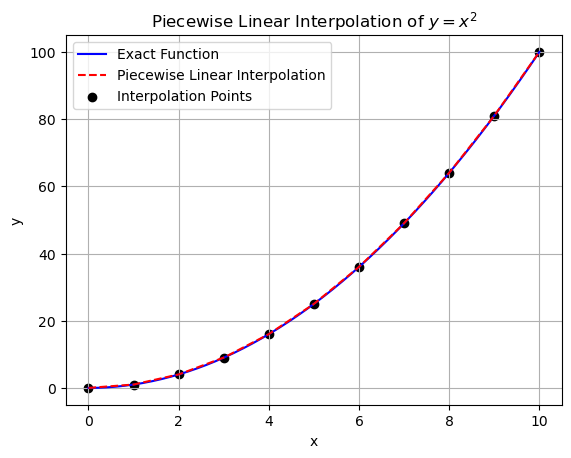

Max error in segment 1 [0.00, 1.00]: 2.499745e-01
Max error in segment 2 [1.00, 2.00]: 2.499745e-01
Max error in segment 3 [2.00, 3.00]: 2.499745e-01
Max error in segment 4 [3.00, 4.00]: 2.499745e-01
Max error in segment 5 [4.00, 5.00]: 2.499745e-01
Max error in segment 6 [5.00, 6.00]: 2.499745e-01
Max error in segment 7 [6.00, 7.00]: 2.499745e-01
Max error in segment 8 [7.00, 8.00]: 2.499745e-01
Max error in segment 9 [8.00, 9.00]: 2.499745e-01
Max error in segment 10 [9.00, 10.00]: 2.499745e-01


In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

x0, x1 = 0.0, 10.0
def f(x): 
    return x**2

def piecewise_linear_interpolation(x, x_points, y_points):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i + 1]:
            # Linear interpolation formula
            return y_points[i] + (y_points[i + 1] - y_points[i]) * (x - x_points[i]) / (x_points[i + 1] - x_points[i])
    raise ValueError("x is out of bounds")

num_points = 11
x_points = np.linspace(x0, x1, num_points)
y_points = f(x_points)

# Max error per segment
max_errors = []
for i in range(num_points - 1):
    x_start = x_points[i]
    x_end = x_points[i + 1]
    x_test = np.linspace(x_start, x_end, 100)
    y_exact = f(x_test)
    y_interp = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_test])
    max_error = np.max(np.abs(y_exact - y_interp))
    max_errors.append(max_error)

# Plotting
x_fine = np.linspace(x0, x1, 200)
y_fine = f(x_fine)
y_interp_fine = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_fine]) 
plt.plot(x_fine, y_fine, label='Exact Function', color='blue')
plt.plot(x_fine, y_interp_fine, label='Piecewise Linear Interpolation', color='red', linestyle='--')
plt.scatter(x_points, y_points, color='black', label='Interpolation Points')
plt.title('Piecewise Linear Interpolation of $y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# display max errors
for i, error in enumerate(max_errors):
    print(f"Max error in segment {i+1} [{x_points[i]:.2f}, {x_points[i+1]:.2f}]: {error:.6e}")


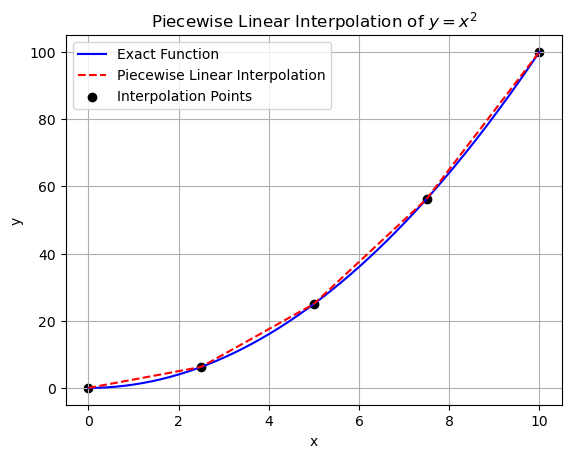

Max error in segment 1 [0.00, 2.50]: 1.562341e+00
Max error in segment 2 [2.50, 5.00]: 1.562341e+00
Max error in segment 3 [5.00, 7.50]: 1.562341e+00
Max error in segment 4 [7.50, 10.00]: 1.562341e+00


In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt

x0, x1 = 0.0, 10.0
def f(x): 
    return x**2

def piecewise_linear_interpolation(x, x_points, y_points):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i + 1]:
            # Linear interpolation formula
            return y_points[i] + (y_points[i + 1] - y_points[i]) * (x - x_points[i]) / (x_points[i + 1] - x_points[i])
    raise ValueError("x is out of bounds")

num_points = 5
x_points = np.linspace(x0, x1, num_points)
y_points = f(x_points)

# Max error per segment
max_errors = []
for i in range(num_points - 1):
    x_start = x_points[i]
    x_end = x_points[i + 1]
    x_test = np.linspace(x_start, x_end, 100)
    y_exact = f(x_test)
    y_interp = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_test])
    max_error = np.max(np.abs(y_exact - y_interp))
    max_errors.append(max_error)

# Plotting
x_fine = np.linspace(x0, x1, 200)
y_fine = f(x_fine)
y_interp_fine = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_fine]) 
plt.plot(x_fine, y_fine, label='Exact Function', color='blue')
plt.plot(x_fine, y_interp_fine, label='Piecewise Linear Interpolation', color='red', linestyle='--')
plt.scatter(x_points, y_points, color='black', label='Interpolation Points')
plt.title('Piecewise Linear Interpolation of $y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# display max errors
for i, error in enumerate(max_errors):
    print(f"Max error in segment {i+1} [{x_points[i]:.2f}, {x_points[i+1]:.2f}]: {error:.6e}")


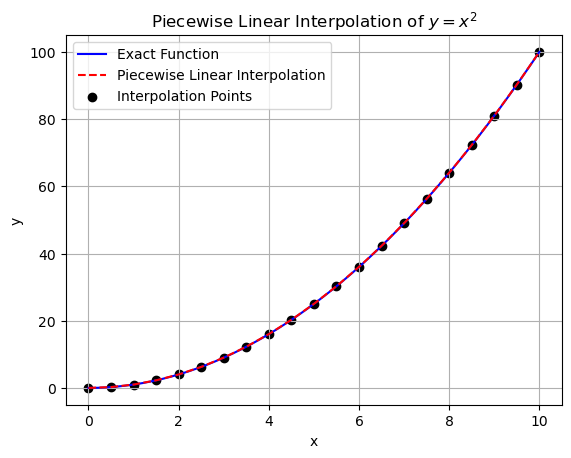

Max error in segment 1 [0.00, 0.50]: 6.249362e-02
Max error in segment 2 [0.50, 1.00]: 6.249362e-02
Max error in segment 3 [1.00, 1.50]: 6.249362e-02
Max error in segment 4 [1.50, 2.00]: 6.249362e-02
Max error in segment 5 [2.00, 2.50]: 6.249362e-02
Max error in segment 6 [2.50, 3.00]: 6.249362e-02
Max error in segment 7 [3.00, 3.50]: 6.249362e-02
Max error in segment 8 [3.50, 4.00]: 6.249362e-02
Max error in segment 9 [4.00, 4.50]: 6.249362e-02
Max error in segment 10 [4.50, 5.00]: 6.249362e-02
Max error in segment 11 [5.00, 5.50]: 6.249362e-02
Max error in segment 12 [5.50, 6.00]: 6.249362e-02
Max error in segment 13 [6.00, 6.50]: 6.249362e-02
Max error in segment 14 [6.50, 7.00]: 6.249362e-02
Max error in segment 15 [7.00, 7.50]: 6.249362e-02
Max error in segment 16 [7.50, 8.00]: 6.249362e-02
Max error in segment 17 [8.00, 8.50]: 6.249362e-02
Max error in segment 18 [8.50, 9.00]: 6.249362e-02
Max error in segment 19 [9.00, 9.50]: 6.249362e-02
Max error in segment 20 [9.50, 10.00]: 6

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt

x0, x1 = 0.0, 10.0
def f(x): 
    return x**2

def piecewise_linear_interpolation(x, x_points, y_points):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i + 1]:
            # Linear interpolation formula
            return y_points[i] + (y_points[i + 1] - y_points[i]) * (x - x_points[i]) / (x_points[i + 1] - x_points[i])
    raise ValueError("x is out of bounds")

num_points = 21
x_points = np.linspace(x0, x1, num_points)
y_points = f(x_points)

# Max error per segment
max_errors = []
for i in range(num_points - 1):
    x_start = x_points[i]
    x_end = x_points[i + 1]
    x_test = np.linspace(x_start, x_end, 100)
    y_exact = f(x_test)
    y_interp = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_test])
    max_error = np.max(np.abs(y_exact - y_interp))
    max_errors.append(max_error)

# Plotting
x_fine = np.linspace(x0, x1, 200)
y_fine = f(x_fine)
y_interp_fine = np.array([piecewise_linear_interpolation(xi, x_points, y_points) for xi in x_fine]) 
plt.plot(x_fine, y_fine, label='Exact Function', color='blue')
plt.plot(x_fine, y_interp_fine, label='Piecewise Linear Interpolation', color='red', linestyle='--')
plt.scatter(x_points, y_points, color='black', label='Interpolation Points')
plt.title('Piecewise Linear Interpolation of $y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# display max errors
for i, error in enumerate(max_errors):
    print(f"Max error in segment {i+1} [{x_points[i]:.2f}, {x_points[i+1]:.2f}]: {error:.6e}")


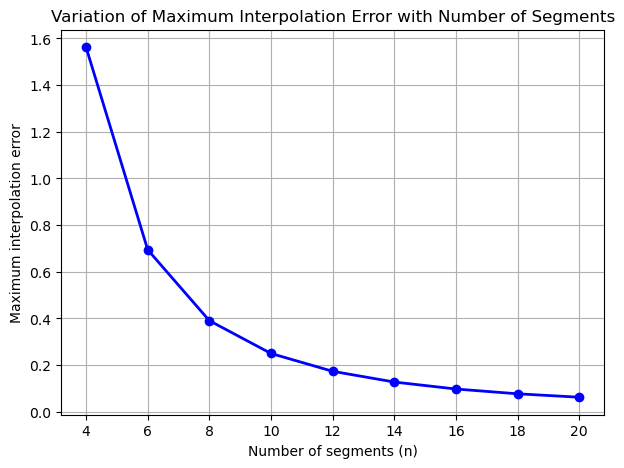

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2

x0, x1 = 0.0, 10.0

n_values = [5, 7, 9, 11, 13, 15, 17, 19, 21]
overall_max_errors = []

for num_points in n_values:
    x_points = np.linspace(x0, x1, num_points)
    y_points = f(x_points)
    max_errors = []

    for i in range(num_points - 1):
        x_start, x_end = x_points[i], x_points[i + 1]
        x_test = np.linspace(x_start, x_end, 100)
        y_exact = f(x_test)
        y_interp = np.interp(x_test, x_points, y_points)
        max_error = np.max(np.abs(y_exact - y_interp))
        max_errors.append(max_error)
    
    overall_max_errors.append(max(max_errors))

# Plot: variation of maximum error with number of segments
plt.figure(figsize=(7,5))
plt.plot(np.array(n_values) - 1, overall_max_errors, 'o-', color='blue', lw=2)
plt.title('Variation of Maximum Interpolation Error with Number of Segments')
plt.xlabel('Number of segments (n)')
plt.ylabel('Maximum interpolation error')
plt.grid(True)
plt.show()


The second derivative of the function is constant (2), so all the segments will have the same maximum error for a given number of data points. The maximum error in each segment will occur at the midpoint of the segment. The overall maximum error follows the analytical expression:

$$ E_{max} = \frac{h^2}{4}, \quad h = \frac{x_1 - x_0}{n} $$

where $h$ is the width of each segment. Thus,

$$ E_{max} = \frac{(x_1 - x_0)^2}{4 n^2} \rightarrow E_{max} \propto \frac{1}{n^2} $$

Therefore, increasing the number of segments $n$ will decrease the maximum error quadratically.